In [1]:
!pip3 install networkx==2.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 4.9 MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556009 sha256=3cb0050c88f216ce8493da8d2aeab57b6b0f63dcbee0e98bb12c6f025ea2cd2b
  Stored in directory: /root/.cache/pip/wheels/44/e6/b8/4efaab31158e9e9ca9ed80b11f6b11130bac9a9672b3cbbeaf
Successfully built networkx
  Attempting uninstall: networkx
    Found existing installation: networkx 2.6.3
    Uninstalling networkx-2.6.3:
      Successfully uninstalled networkx-2.6.3


In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_nodes = pd.read_csv('Dining-table_partners [Nodes].csv')
df_edges = pd.read_csv('Dining-table_partners [Edges].csv')

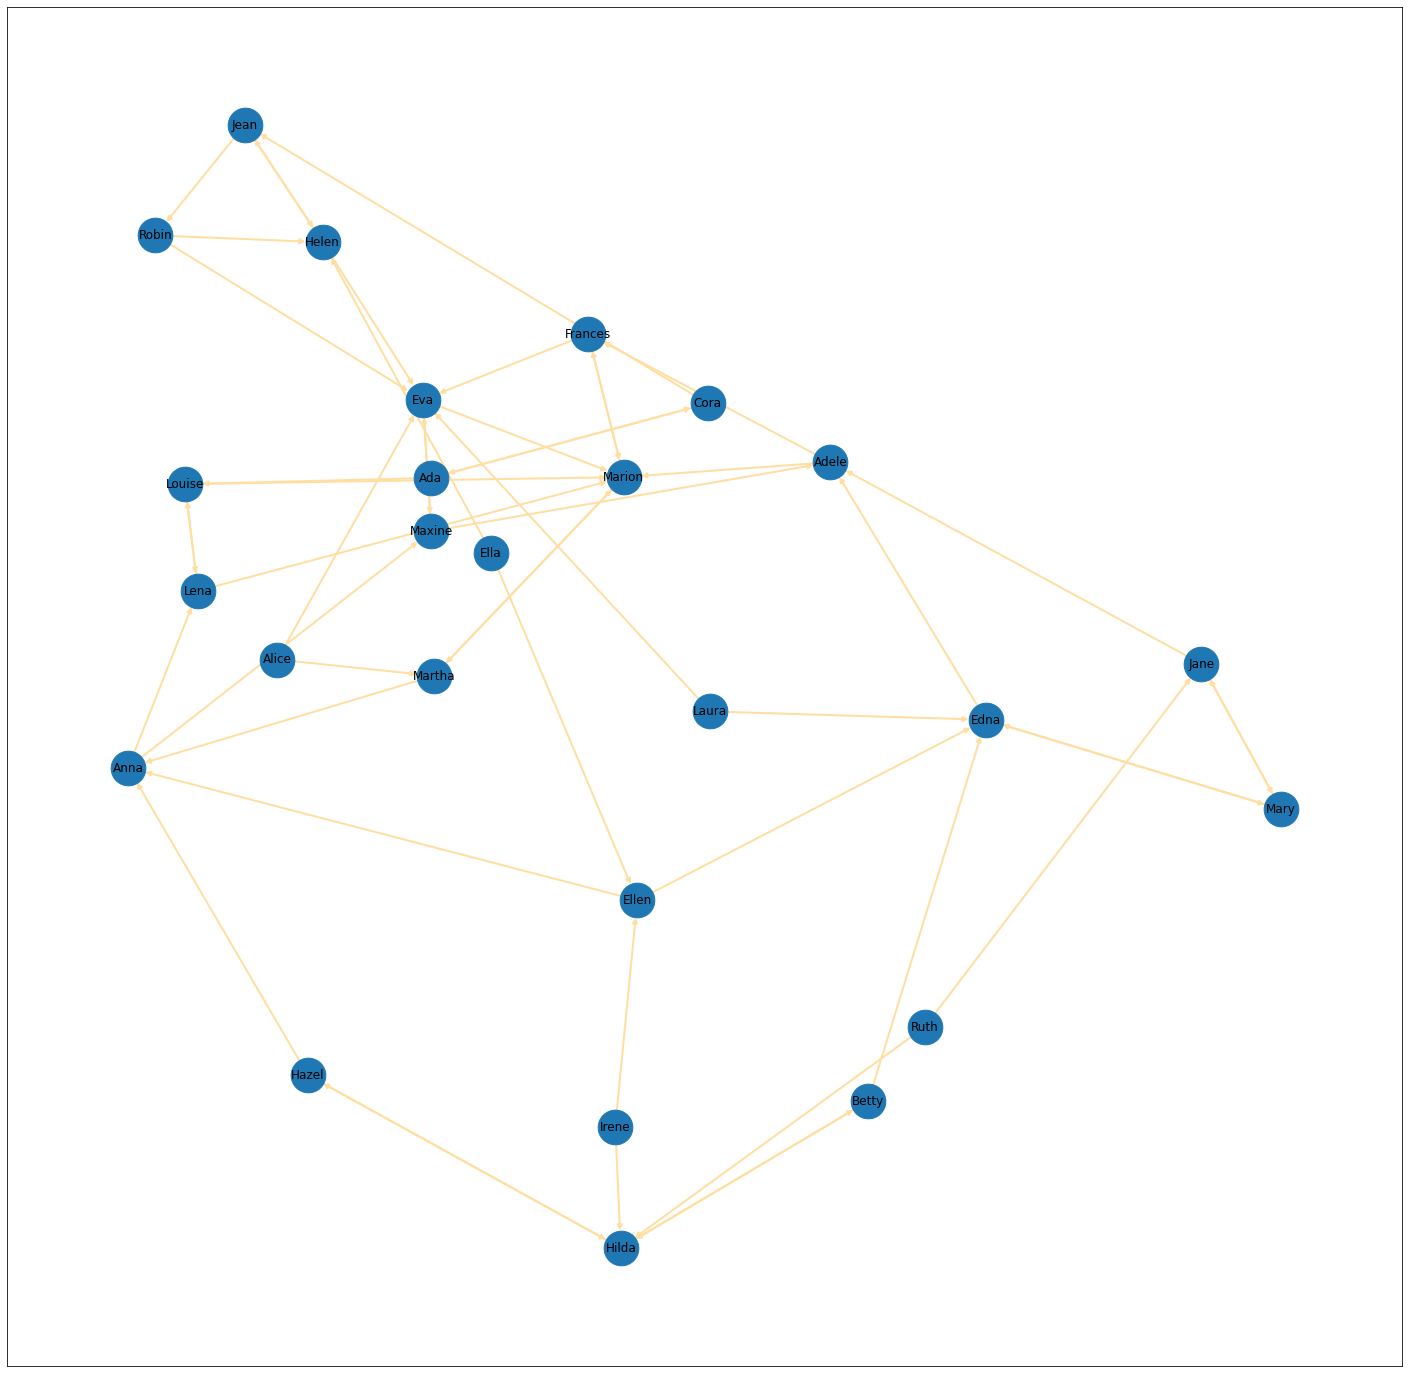

In [14]:
merge = df_edges.merge(df_nodes, on='Id', how='inner')
merge = merge[merge.columns.drop(merge.filter(regex='_x'))]

G = nx.DiGraph(edge_attr='Weight')

for index, row in df_nodes.iterrows():
    G.add_node(row['Label'])

for index, row in df_edges.iterrows():
    G.add_weighted_edges_from([(row['Source'], row['Target'], row['Weight'])])

color_map = {1:'#f09494', 2:'#eebcbc', 3:'#72bbd0', 4:'#91f0a1', 5:'#629fff', 6:'#bcc2f2',  
             7:'#eebcbc', 8:'#f1f0c0', 9:'#d2ffe7', 10:'#caf3a6', 11:'#ffdf55', 12:'#ef77aa', 
             13:'#d6dcff', 14:'#d2f5f0'} 

relabel = {1: "Ada", 2: "Cora", 3: "Louise", 4: "Jean", 5: "Helen", 6: "Martha",
             7: "Alice", 8: "Robin", 9: "Marion", 10: "Maxine", 11: "Lena", 12: "Hazel",
             13: "Hilda", 14: "Frances", 15: "Eva", 16: "Ruth", 17: "Edna", 18: "Adele",
             19: "Jane", 20: "Anna", 21: "Mary", 22: "Betty", 23: "Ella", 24: "Ellen",
             25: "Laura", 26: "Irene"}

plt.figure(figsize=(25,25))
options = {
    'edge_color': '#FFDEA2',
    'width': 2,
    'node_size' : 1200,
    'with_labels': True,
    'font_weight': 'regular',
}

G = nx.relabel_nodes(G, relabel)

"""
Using the spring layout : 
- k controls the distance between the nodes and varies between 0 and 1
- iterations is the number of times simulated annealing is run
default k=0.1 and iterations=50
"""
pos=nx.spring_layout(G, k=0.1, iterations=15)
nx.draw_networkx(G, pos=pos, **options)
plt.show()

In [15]:
neighbours = {n: len(list(nx.all_neighbors(G, n))) for n in G.nodes}

In [16]:
print(neighbours)
print(max(neighbours, key=neighbours.get))

{'Ada': 3, 'Cora': 3, 'Louise': 4, 'Jean': 4, 'Helen': 5, 'Martha': 4, 'Alice': 2, 'Robin': 3, 'Marion': 8, 'Maxine': 4, 'Lena': 4, 'Hazel': 3, 'Hilda': 6, 'Frances': 4, 'Eva': 8, 'Ruth': 2, 'Edna': 6, 'Adele': 5, 'Jane': 4, 'Anna': 5, 'Mary': 4, 'Betty': 3, 'Ella': 2, 'Ellen': 4, 'Laura': 2, 'Irene': 2}
Marion
